In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from wordcloud import WordCloud

import missingno as mno

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
df.shape

(3044, 10)

In [8]:
df.columns = ['SNo','Date','StartupName','IndustryVertical','SubVertical',
             'City','InvestorsName','InvestmentType','AmountInUSD',
             'Remarks']

In [9]:
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

In [10]:
# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))

In [11]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [12]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [13]:
df.replace('nan',np.nan,inplace=True)

<AxesSubplot:>

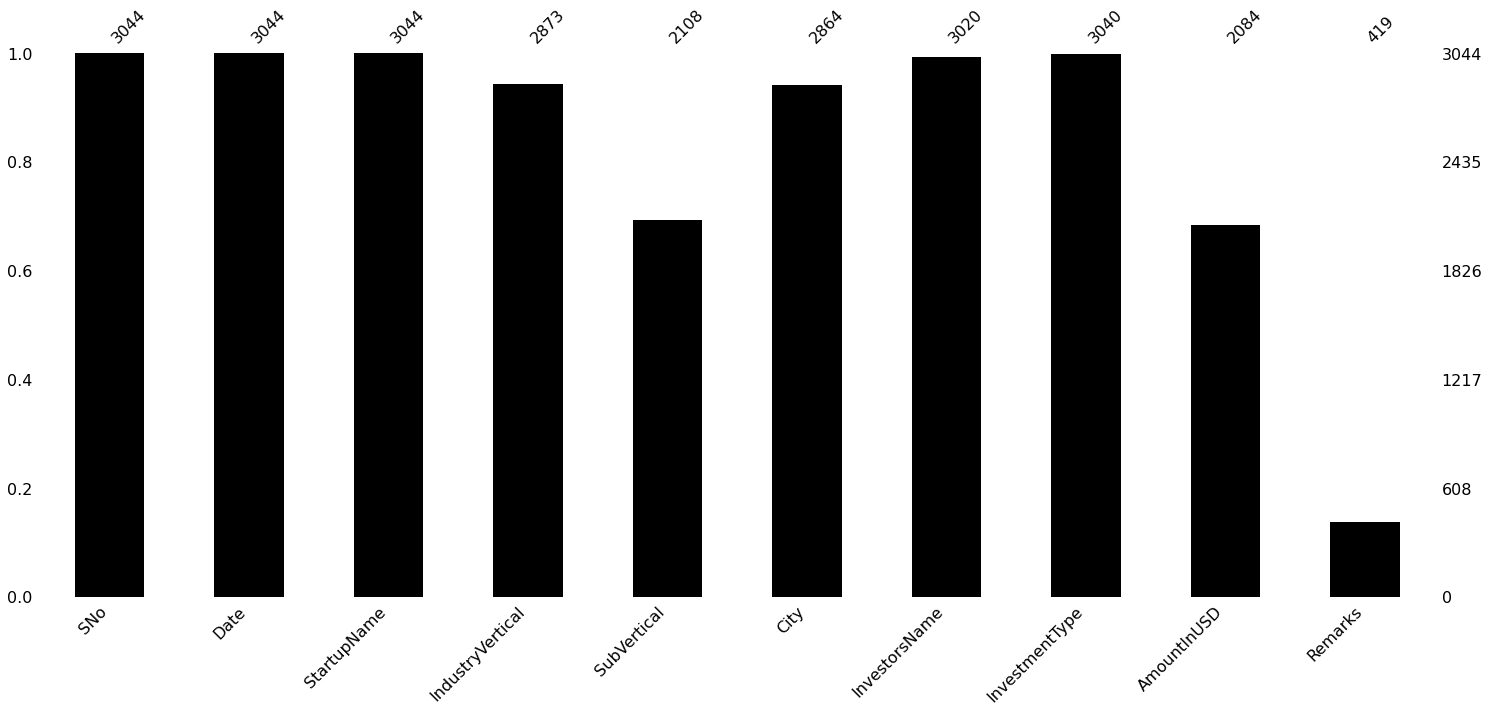

In [14]:
mno.bar(df,color='black')

In [15]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
AmountInUSD          960
Remarks             2625
dtype: int64

In [16]:
df.drop('Remarks',axis=1,inplace=True)

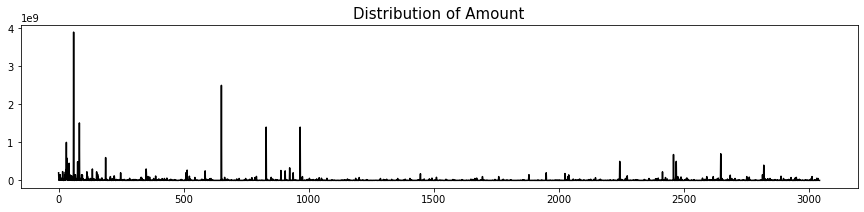

In [17]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
df['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [18]:
## Cleaning the dates

df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


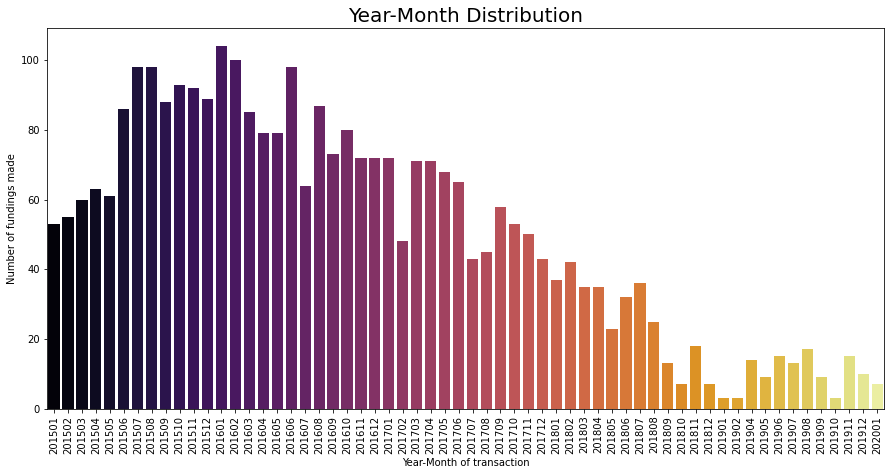

In [19]:
df["yearmonth"] = (pd.to_datetime(df['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)
    
temp = df['yearmonth'].value_counts().sort_values(ascending=False).head(10)

print("number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df['yearmonth'].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(year_month.index,year_month.values,palette='inferno')
plt.xticks(rotation=90)
plt.xlabel("Year-Month of transaction",fontsize=10)
plt.ylabel("Number of fundings made",fontsize=10)
plt.title("Year-Month Distribution",fontsize=20)
plt.show()

In [20]:
print("Maximum funding" ,df['AmountInUSD'].dropna().max())

Maximum funding 3900000000.0


In [21]:
# lets check out different ventures of Paytm
df[df.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [22]:
df[df["StartupName"] == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [23]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", df["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [24]:
df[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD',ascending=True).head()

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [25]:
df[df['AmountInUSD'] == -999.0].shape

(971, 10)

In [26]:
# Average Funding
print("On Average indian startups got funding of : ", df["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  13270058.261169514


Total startups funded :: 2457
Swiggy           8
Ola Cabs         8
Paytm            7
Nykaa            6
Medinfi          6
UrbanClap        6
NoBroker         6
Meesho           6
Flipkart         5
Uniphore         5
Capital Float    5
Grofers          5
Moglix           5
Jugnoo           5
Toppr            5
Icertis          4
Tracxn           4
EazyDiner        4
HolaChef         4
Udaan            4
Name: StartupName, dtype: int64


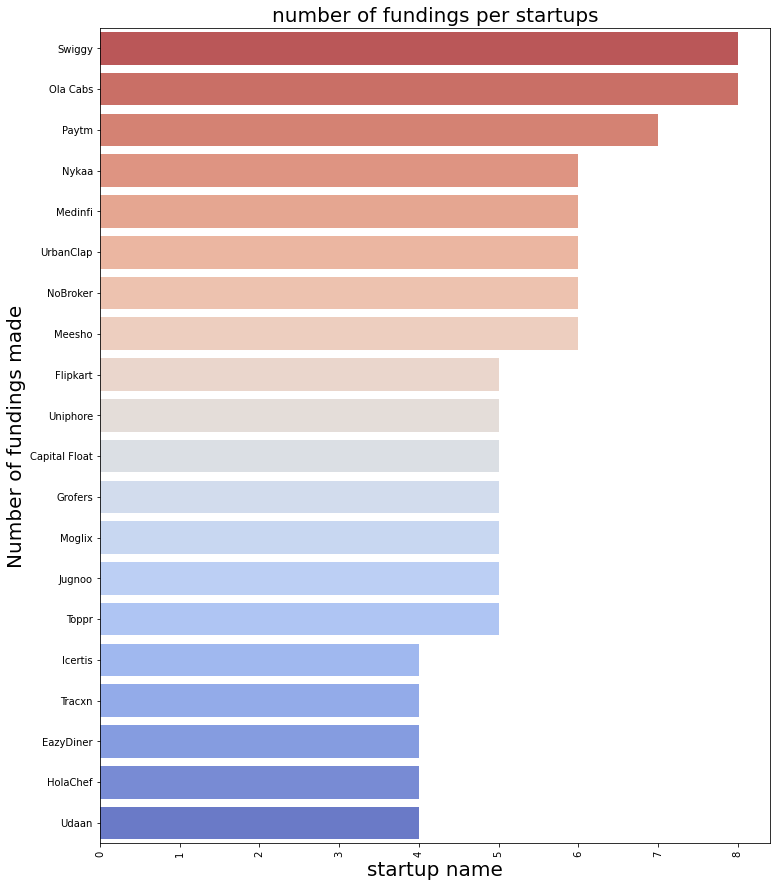

In [27]:
print("Total startups funded ::",df['StartupName'].nunique())

print(df['StartupName'].value_counts().head(20))

startupname = df['StartupName'].value_counts().head(20)

plt.figure(figsize=(12,15))
sns.barplot(y=startupname.index,x=startupname.values,alpha=0.9,palette='coolwarm_r')
plt.xticks(rotation='vertical')
plt.xlabel("startup name",fontsize=20)
plt.ylabel('Number of fundings made',fontsize=20)
plt.title("number of fundings per startups",fontsize=20)
plt.show()

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: IndustryVertical, dtype: int64


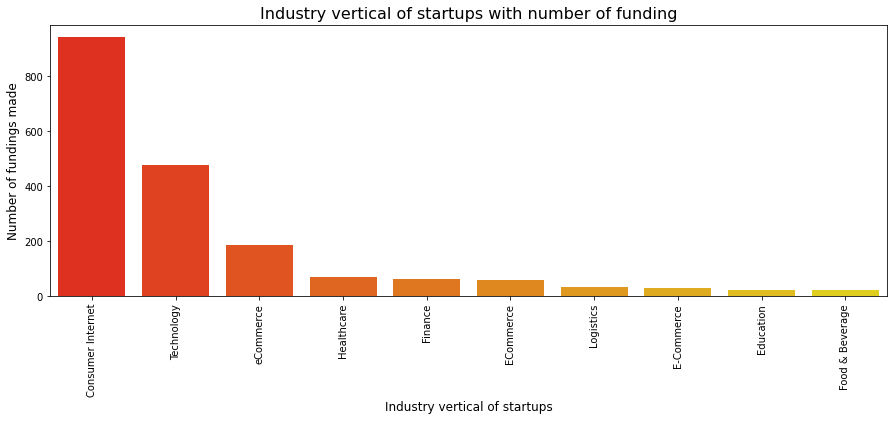

In [28]:
# lets analyze the Industry of the Startups

# data cleaning
df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = df['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Pharmacy                  10
Food Delivery Platform            8
Online lending platform           5
Education                         5
Online Learning Platform          5
Online Education Platform         5
Online Lending                    5
Non-Banking Financial Company     4
Online Food Delivery              4
Agri-tech                         3
Online Gifting platform           3
Fitness Mobile App                3
Online learning platform          3
Online Insurance Aggregator       3
Online Furniture Store            3
Logistics                         3
B2B Marketplace                   3
Online Marketplace                3
SaaS                              3
Online Payment Gateway            3
Name: SubVertical, dtype: int64


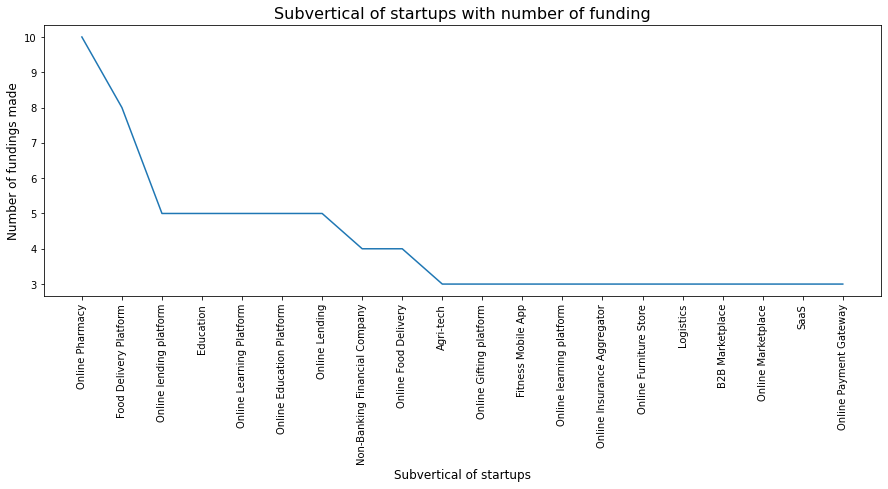

In [29]:
# lets analyze the sub vertical industries

industry = df['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.style.use('fivethirtyeight')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

Bangalore    842
Mumbai       568
New Delhi    424
Gurgaon      291
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Gurugram      50
Ahmedabad     38
Name: City, dtype: int64


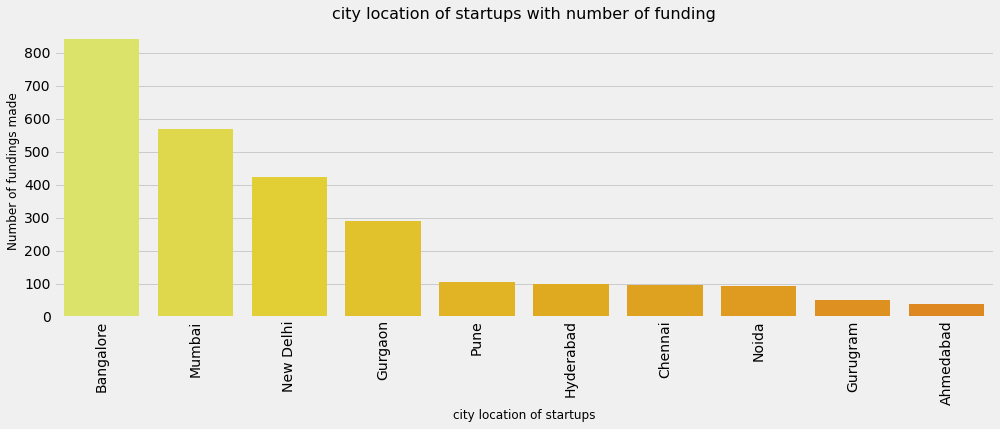

In [30]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
df['City'] = df['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = df['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
Name: InvestorsName, dtype: int64


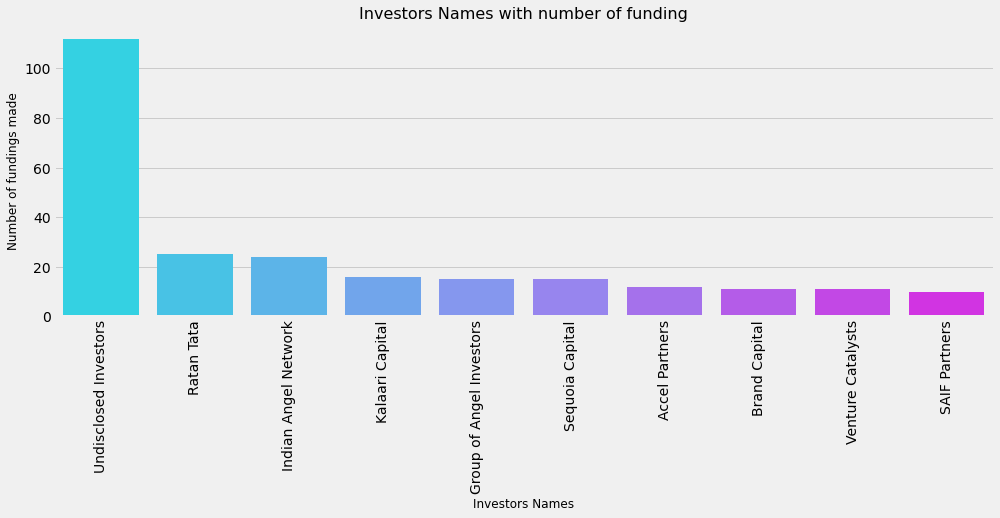

In [31]:
# lets analyze the investors on startups

# lets clean the dataset
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = df['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


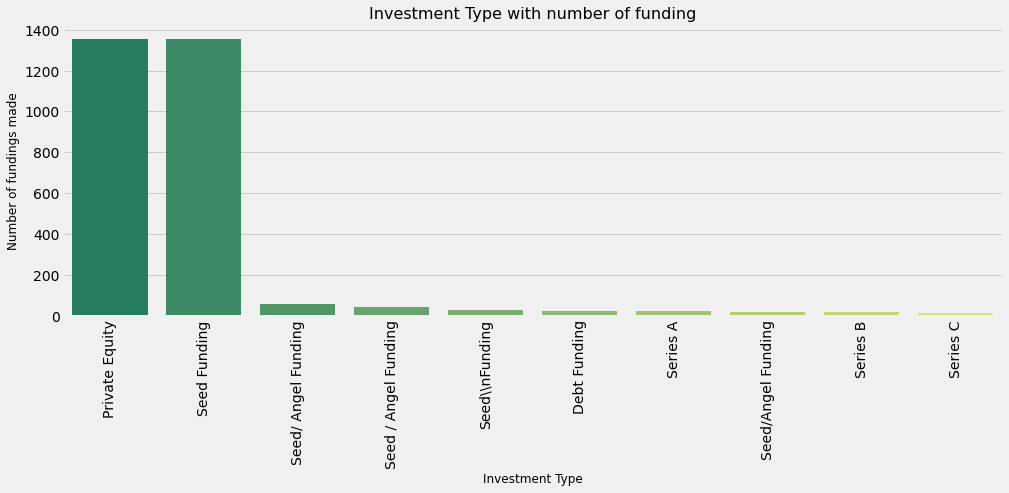

In [32]:
# lets analyze the investment
investment = df['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
df['InvestmentType'][df['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
df['InvestmentType'][df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()